<a href="https://colab.research.google.com/github/KseniiaTsyganova/bootstrap-regularization/blob/main/BOOTSTRAP_REGULARIZATION_more_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# more data bootstrap regularization method

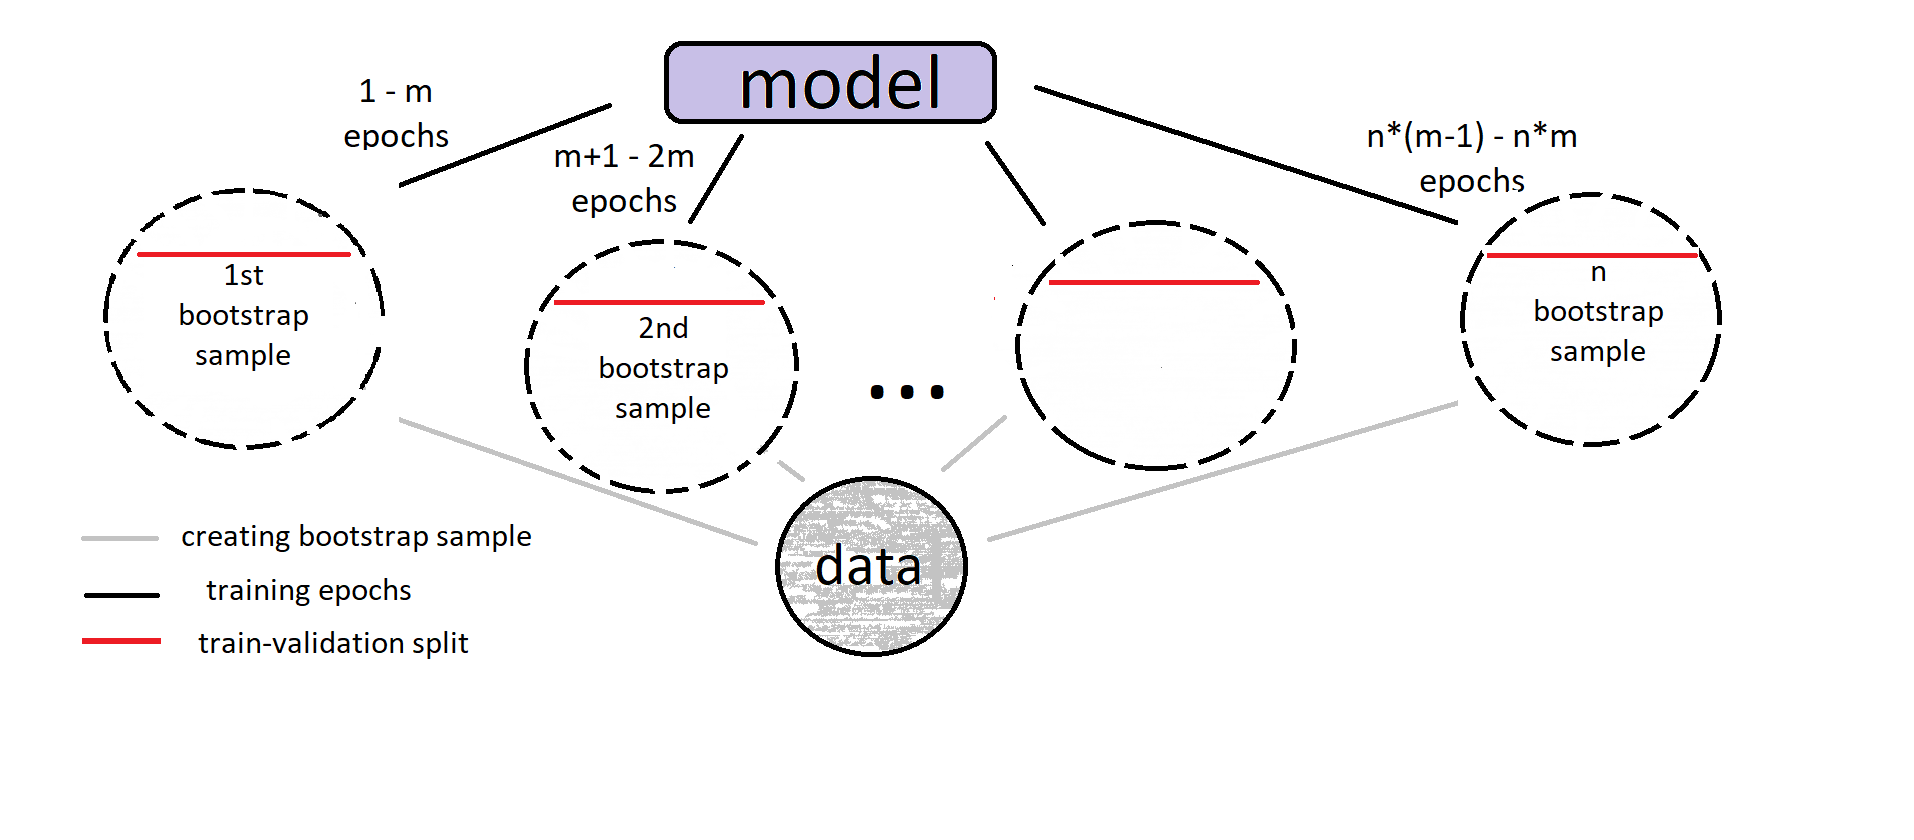

In [1]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_california_housing

Mounted at /content/drive


In [2]:
BOOTSTRAP_EPOCHS = 50
BOOTSTRAP_SAMPLES = 10 
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 64
EPOCHS = 500
TEST_SIZE = 0.2
RS = 42

For regular training we will create a simple neural network and we will train it during 500 epochs.

For training with bootstrap samples we will create second model with the same architecture. 
We will create 10 bootstrap samples with twice actual data size and train our second model sequentially on each of them for 50 epochs. So the final number of training epochs will be the same as for the first model - 500.

# Binary classification

## Experiment 1
### Mine or rock dataset

sourse:
https://www.kaggle.com/datasets/rupakroy/sonarcsv

In [3]:
data = pd.read_csv('/content/drive/MyDrive/datasets/sonar.csv')
X = data.drop(['R'], axis=1)
y = np.where(data.R == 'R', 0, 1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RS)
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]

In [4]:
model_1 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'), 
    Dense(1, activation='sigmoid')
])

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/500
3/3 [==============================] - 1s 132ms/step - loss: 0.7018 - accuracy: 0.5000 - val_loss: 0.6432 - val_accuracy: 0.6667
Epoch 2/500
3/3 [==============================] - 0s 18ms/step - loss: 0.6819 - accuracy: 0.5000 - val_loss: 0.6314 - val_accuracy: 0.6970
Epoch 3/500
3/3 [==============================] - 0s 17ms/step - loss: 0.6723 - accuracy: 0.5152 - val_loss: 0.6243 - val_accuracy: 0.7273
Epoch 4/500
3/3 [==============================] - 0s 17ms/step - loss: 0.6627 - accuracy: 0.5606 - val_loss: 0.6217 - val_accuracy: 0.7879
Epoch 5/500
3/3 [==============================] - 0s 16ms/step - loss: 0.6495 - accuracy: 0.6591 - val_loss: 0.6202 - val_accuracy: 0.7576
Epoch 6/500
3/3 [==============================] - 0s 17ms/step - loss: 0.6384 - accuracy: 0.7121 - val_loss: 0.6203 - val_accuracy: 0.6667
Epoch 7/500
3/3 [==============================] - 0s 18ms/step - loss: 0.6273 - accuracy: 0.7045 - val_loss: 0.6076 - val_accuracy: 0.6667
Epoch 8/500
3/3 [==

In [5]:
model_2 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'), 
    Dense(1, activation='sigmoid')
])

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

df = pd.DataFrame(columns=['loss', 'accuracy', 'val_loss', 'val_accuracy'])

for i in range(BOOTSTRAP_SAMPLES):
    train_data = x_train.sample(BOOTSTRAP_SAMPLE*2, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)



Epoch 1/50
5/5 [==============================] - 1s 57ms/step - loss: 0.6737 - accuracy: 0.6553 - val_loss: 0.6525 - val_accuracy: 0.6667
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 0.6424 - accuracy: 0.6856 - val_loss: 0.6316 - val_accuracy: 0.7121
Epoch 3/50
5/5 [==============================] - 0s 10ms/step - loss: 0.6140 - accuracy: 0.6856 - val_loss: 0.6141 - val_accuracy: 0.7121
Epoch 4/50
5/5 [==============================] - 0s 14ms/step - loss: 0.5869 - accuracy: 0.7197 - val_loss: 0.5901 - val_accuracy: 0.6818
Epoch 5/50
5/5 [==============================] - 0s 11ms/step - loss: 0.5518 - accuracy: 0.8068 - val_loss: 0.5669 - val_accuracy: 0.7121
Epoch 6/50
5/5 [==============================] - 0s 15ms/step - loss: 0.5116 - accuracy: 0.8371 - val_loss: 0.5433 - val_accuracy: 0.6818
Epoch 7/50
5/5 [==============================] - 0s 15ms/step - loss: 0.4765 - accuracy: 0.8295 - val_loss: 0.5286 - val_accuracy: 0.7424
Epoch 8/50
5/5 [===========

<ipython-input-5-fb59f12cbfe3>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 40ms/step - loss: 0.1885 - accuracy: 0.9280 - val_loss: 0.1135 - val_accuracy: 0.9697
Epoch 2/50
5/5 [==============================] - 0s 15ms/step - loss: 0.1875 - accuracy: 0.9394 - val_loss: 0.0962 - val_accuracy: 0.9848
Epoch 3/50
5/5 [==============================] - 0s 14ms/step - loss: 0.1841 - accuracy: 0.9167 - val_loss: 0.1169 - val_accuracy: 0.9697
Epoch 4/50
5/5 [==============================] - 0s 14ms/step - loss: 0.1818 - accuracy: 0.9432 - val_loss: 0.0863 - val_accuracy: 1.0000
Epoch 5/50
5/5 [==============================] - 0s 14ms/step - loss: 0.1676 - accuracy: 0.9470 - val_loss: 0.0813 - val_accuracy: 0.9848
Epoch 6/50
5/5 [==============================] - 0s 14ms/step - loss: 0.1491 - accuracy: 0.9545 - val_loss: 0.0744 - val_accuracy: 1.0000
Epoch 7/50
5/5 [==============================] - 0s 17ms/step - loss: 0.1227 - accuracy: 0.9811 - val_loss: 0.0675 - val_accuracy: 1.0000
Epoch 8/50
5/5 [======================

<ipython-input-5-fb59f12cbfe3>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 10ms/step - loss: 0.1269 - accuracy: 0.9735 - val_loss: 0.0496 - val_accuracy: 0.9848
Epoch 3/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0896 - accuracy: 0.9697 - val_loss: 0.0515 - val_accuracy: 0.9848
Epoch 4/50
5/5 [==============================] - 0s 16ms/step - loss: 0.0636 - accuracy: 0.9848 - val_loss: 0.0487 - val_accuracy: 1.0000
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0518 - accuracy: 0.9886 - val_loss: 0.0314 - val_accuracy: 1.0000
Epoch 6/50
5/5 [==============================] - 0s 14ms/step - loss: 0.0401 - accuracy: 0.9962 - val_loss: 0.0257 - val_accuracy: 1.0000
Epoch 7/50
5/5 [==============================] - 0s 14ms/step - loss: 0.0330 - accuracy: 0.9962 - val_loss: 0.0311 - val_accuracy: 1.0000
Epoch 8/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0317 - accuracy: 1.0000 - val_loss: 0.0350 - val_accuracy: 1.0000
Epoch 9/50
5/5 [======================

<ipython-input-5-fb59f12cbfe3>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 28ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.0411 - val_accuracy: 0.9545
Epoch 2/50
5/5 [==============================] - 0s 15ms/step - loss: 0.0193 - accuracy: 0.9924 - val_loss: 0.0387 - val_accuracy: 1.0000
Epoch 3/50
5/5 [==============================] - 0s 11ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0359 - val_accuracy: 0.9848
Epoch 4/50
5/5 [==============================] - 0s 15ms/step - loss: 0.0211 - accuracy: 0.9962 - val_loss: 0.0335 - val_accuracy: 1.0000
Epoch 5/50
5/5 [==============================] - 0s 15ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.0180 - val_accuracy: 1.0000
Epoch 6/50
5/5 [==============================] - 0s 15ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 7/50
5/5 [==============================] - 0s 15ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy: 1.0000
Epoch 8/50
5/5 [======================

<ipython-input-5-fb59f12cbfe3>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 34ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 2/50
5/5 [==============================] - 0s 11ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 3/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 4/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 5/50
5/5 [==============================] - 0s 11ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 6/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 7/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 8/50
5/5 [======================

<ipython-input-5-fb59f12cbfe3>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 15ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3/50
5/5 [==============================] - 0s 16ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4/50
5/5 [==============================] - 0s 14ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 7/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 8/50
5/5 [==============================] - 0s 16ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 9.6704e-04 - val_accuracy: 1.0000
Epoch 9/50
5/5 [==================

<ipython-input-5-fb59f12cbfe3>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 66ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 2/50
5/5 [==============================] - 0s 44ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 3/50
5/5 [==============================] - 0s 19ms/step - loss: 9.8736e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 4/50
5/5 [==============================] - 0s 29ms/step - loss: 9.5829e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 9.2733e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/50
5/5 [==============================] - 0s 10ms/step - loss: 8.8821e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/50
5/5 [==============================] - 0s 14ms/step - loss: 8.7017e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 8/50
5/5 [==

<ipython-input-5-fb59f12cbfe3>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 36ms/step - loss: 9.6984e-04 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2/50
5/5 [==============================] - 0s 18ms/step - loss: 7.2735e-04 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3/50
5/5 [==============================] - 0s 14ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 4/50
5/5 [==============================] - 0s 17ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 9.2966e-04 - val_accuracy: 1.0000
Epoch 5/50
5/5 [==============================] - 0s 20ms/step - loss: 8.1145e-04 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 6/50
5/5 [==============================] - 0s 18ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 7/50
5/5 [==============================] - 0s 14ms/step - loss: 6.7162e-04 - accuracy: 1.0000 - val_loss: 7.6852e-04 - val_accuracy: 1.0000
Epoch 8/50
5/5

<ipython-input-5-fb59f12cbfe3>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 39ms/step - loss: 6.3616e-04 - accuracy: 1.0000 - val_loss: 5.2296e-04 - val_accuracy: 1.0000
Epoch 2/50
5/5 [==============================] - 0s 15ms/step - loss: 6.2904e-04 - accuracy: 1.0000 - val_loss: 4.8954e-04 - val_accuracy: 1.0000
Epoch 3/50
5/5 [==============================] - 0s 20ms/step - loss: 6.0841e-04 - accuracy: 1.0000 - val_loss: 5.0168e-04 - val_accuracy: 1.0000
Epoch 4/50
5/5 [==============================] - 0s 19ms/step - loss: 5.8608e-04 - accuracy: 1.0000 - val_loss: 5.1276e-04 - val_accuracy: 1.0000
Epoch 5/50
5/5 [==============================] - 0s 22ms/step - loss: 5.7208e-04 - accuracy: 1.0000 - val_loss: 4.9104e-04 - val_accuracy: 1.0000
Epoch 6/50
5/5 [==============================] - 0s 20ms/step - loss: 5.5627e-04 - accuracy: 1.0000 - val_loss: 5.0133e-04 - val_accuracy: 1.0000
Epoch 7/50
5/5 [==============================] - 0s 17ms/step - loss: 5.3696e-04 - accuracy: 1.0000 - val_loss: 5.5924e-04 - val

<ipython-input-5-fb59f12cbfe3>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 15ms/step - loss: 3.3762e-04 - accuracy: 1.0000 - val_loss: 4.1452e-04 - val_accuracy: 1.0000
Epoch 3/50
5/5 [==============================] - 0s 10ms/step - loss: 3.3312e-04 - accuracy: 1.0000 - val_loss: 4.1747e-04 - val_accuracy: 1.0000
Epoch 4/50
5/5 [==============================] - 0s 14ms/step - loss: 3.2184e-04 - accuracy: 1.0000 - val_loss: 4.1115e-04 - val_accuracy: 1.0000
Epoch 5/50
5/5 [==============================] - 0s 15ms/step - loss: 3.0866e-04 - accuracy: 1.0000 - val_loss: 3.9890e-04 - val_accuracy: 1.0000
Epoch 6/50
5/5 [==============================] - 0s 10ms/step - loss: 3.0410e-04 - accuracy: 1.0000 - val_loss: 3.9255e-04 - val_accuracy: 1.0000
Epoch 7/50
5/5 [==============================] - 0s 14ms/step - loss: 3.0247e-04 - accuracy: 1.0000 - val_loss: 3.9265e-04 - val_accuracy: 1.0000
Epoch 8/50
5/5 [==============================] - 0s 14ms/step - loss: 2.9472e-04 - accuracy: 1.0000 - val_loss: 3.9688e-04 - val

<ipython-input-5-fb59f12cbfe3>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


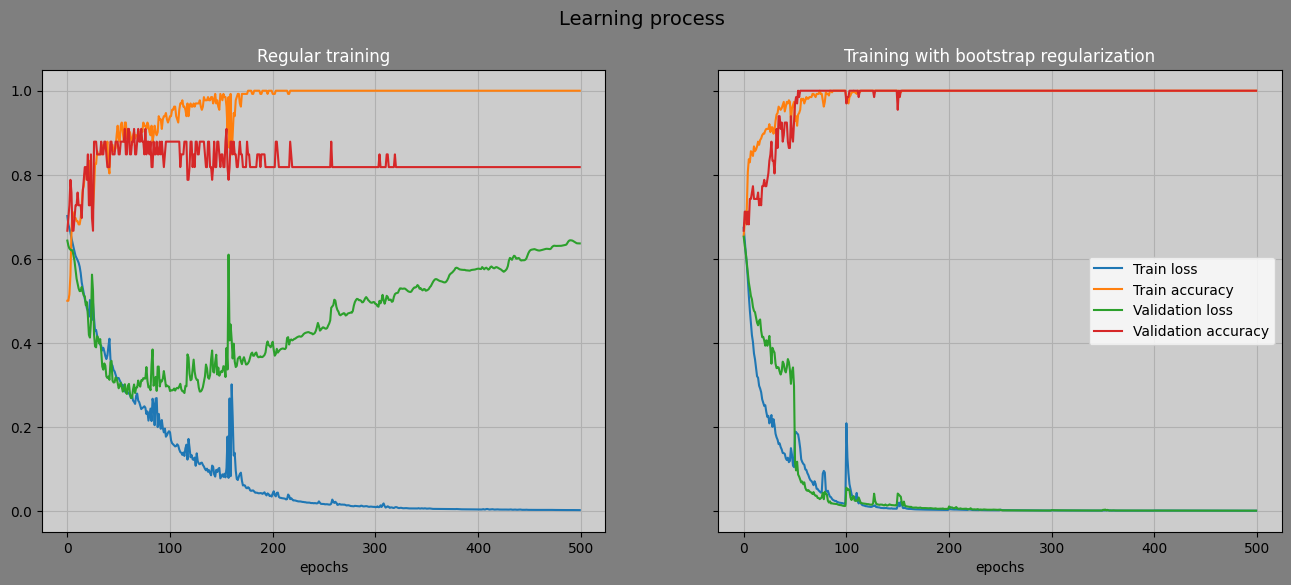

In [6]:

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train accuracy', 'Validation loss', 'Validation accuracy'], loc='best')
plt.show()



In [7]:
loss_1, accuracy_1 = model_1.evaluate(x_test, y_test)
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test accuracy': [accuracy_1, accuracy_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


2/2 [==============================] - 0s 8ms/step - loss: 0.3848 - accuracy: 0.8810


,Test accuracy,Test loss
,,
Regular training,0.833333,0.623907
Boostrap regularization,0.880952,0.384845


## Experiment 2
### Sklearn breast cancer dataset

In [8]:
data = load_breast_cancer()
X = data['data']
y = data['target']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RS)
x_train = pd.DataFrame(x_train)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]

In [9]:
model_1 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'), 
    Dense(1, activation='sigmoid')
])

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/500
6/6 [==============================] - 1s 41ms/step - loss: 21.7245 - accuracy: 0.4478 - val_loss: 1.6420 - val_accuracy: 0.8352
Epoch 2/500
6/6 [==============================] - 0s 12ms/step - loss: 2.3710 - accuracy: 0.7390 - val_loss: 1.7068 - val_accuracy: 0.6264
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 1.5740 - accuracy: 0.7912 - val_loss: 0.9936 - val_accuracy: 0.9011
Epoch 4/500
6/6 [==============================] - 0s 12ms/step - loss: 1.0700 - accuracy: 0.7995 - val_loss: 1.6976 - val_accuracy: 0.8242
Epoch 5/500
6/6 [==============================] - 0s 12ms/step - loss: 1.3109 - accuracy: 0.8791 - val_loss: 1.6074 - val_accuracy: 0.7033
Epoch 6/500
6/6 [==============================] - 0s 13ms/step - loss: 1.5852 - accuracy: 0.7747 - val_loss: 2.3910 - val_accuracy: 0.8242
Epoch 7/500
6/6 [==============================] - 0s 8ms/step - loss: 1.4164 - accuracy: 0.8049 - val_loss: 0.4841 - val_accuracy: 0.9231
Epoch 8/500
6/6 [===

In [10]:
model_2 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'), 
    Dense(1, activation='sigmoid')
])

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

df = pd.DataFrame(columns=['loss', 'accuracy', 'val_loss', 'val_accuracy'])


for i in range(BOOTSTRAP_SAMPLES):
    train_data = x_train.sample(BOOTSTRAP_SAMPLE*2, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


Epoch 1/50
12/12 [==============================] - 2s 32ms/step - loss: 13.7013 - accuracy: 0.5110 - val_loss: 1.3607 - val_accuracy: 0.6813
Epoch 2/50
12/12 [==============================] - 0s 9ms/step - loss: 1.5374 - accuracy: 0.8008 - val_loss: 0.8635 - val_accuracy: 0.8242
Epoch 3/50
12/12 [==============================] - 0s 7ms/step - loss: 0.7909 - accuracy: 0.8984 - val_loss: 0.6408 - val_accuracy: 0.8736
Epoch 4/50
12/12 [==============================] - 0s 9ms/step - loss: 0.4834 - accuracy: 0.9217 - val_loss: 0.3955 - val_accuracy: 0.8956
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.3884 - accuracy: 0.9203 - val_loss: 0.4722 - val_accuracy: 0.8846
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.3902 - accuracy: 0.9121 - val_loss: 0.3809 - val_accuracy: 0.8901
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.3242 - accuracy: 0.9162 - val_loss: 0.3176 - val_accuracy: 0.9286
Epoch 8/50
12/12 [

<ipython-input-10-c463ff9baf5d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 0.4479 - accuracy: 0.8723 - val_loss: 0.7090 - val_accuracy: 0.8571
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.4774 - accuracy: 0.8723 - val_loss: 0.4636 - val_accuracy: 0.8901
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.3064 - accuracy: 0.9066 - val_loss: 0.2485 - val_accuracy: 0.9176
Epoch 5/50
12/12 [==============================] - 0s 7ms/step - loss: 0.4033 - accuracy: 0.9011 - val_loss: 0.5081 - val_accuracy: 0.8901
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.2280 - accuracy: 0.9258 - val_loss: 0.4712 - val_accuracy: 0.8901
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.3955 - accuracy: 0.8970 - val_loss: 0.4489 - val_accuracy: 0.8901
Epoch 8/50
12/12 [==============================] - 0s 7ms/step - loss: 0.2488 - accuracy: 0.9341 - val_loss: 0.1552 - val_accuracy: 0.9396
Epoch 9/50
12/12 [==

<ipython-input-10-c463ff9baf5d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


12/12 [==============================] - 0s 11ms/step - loss: 0.1225 - accuracy: 0.9588 - val_loss: 0.2094 - val_accuracy: 0.9451
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 0.1911 - accuracy: 0.9423 - val_loss: 0.1885 - val_accuracy: 0.9341
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 0.1836 - accuracy: 0.9396 - val_loss: 0.5246 - val_accuracy: 0.8791
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.2528 - accuracy: 0.9245 - val_loss: 0.4600 - val_accuracy: 0.8187
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.2217 - accuracy: 0.9231 - val_loss: 0.2162 - val_accuracy: 0.9341
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.3917 - accuracy: 0.8956 - val_loss: 0.2323 - val_accuracy: 0.9176
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.1640 - accuracy: 0.9396 - val_loss: 0.3146 - val_accuracy: 0.9121
Epoch 8/50
12/12 [============

<ipython-input-10-c463ff9baf5d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


12/12 [==============================] - 0s 16ms/step - loss: 0.1432 - accuracy: 0.9464 - val_loss: 0.1625 - val_accuracy: 0.9505
Epoch 2/50
12/12 [==============================] - 0s 8ms/step - loss: 0.1615 - accuracy: 0.9341 - val_loss: 0.3480 - val_accuracy: 0.8791
Epoch 3/50
12/12 [==============================] - 0s 9ms/step - loss: 0.3953 - accuracy: 0.8915 - val_loss: 0.3571 - val_accuracy: 0.9121
Epoch 4/50
12/12 [==============================] - 0s 7ms/step - loss: 0.2849 - accuracy: 0.9176 - val_loss: 0.0664 - val_accuracy: 0.9615
Epoch 5/50
12/12 [==============================] - 0s 7ms/step - loss: 0.1380 - accuracy: 0.9560 - val_loss: 0.0626 - val_accuracy: 0.9780
Epoch 6/50
12/12 [==============================] - 0s 9ms/step - loss: 0.1599 - accuracy: 0.9505 - val_loss: 0.1300 - val_accuracy: 0.9615
Epoch 7/50
12/12 [==============================] - 0s 8ms/step - loss: 0.1926 - accuracy: 0.9396 - val_loss: 0.5640 - val_accuracy: 0.8242
Epoch 8/50
12/12 [============

<ipython-input-10-c463ff9baf5d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


12/12 [==============================] - 0s 10ms/step - loss: 0.1807 - accuracy: 0.9505 - val_loss: 0.3007 - val_accuracy: 0.9286
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1254 - accuracy: 0.9629 - val_loss: 0.0861 - val_accuracy: 0.9615
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0754 - accuracy: 0.9725 - val_loss: 0.1103 - val_accuracy: 0.9560
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0652 - accuracy: 0.9712 - val_loss: 0.0794 - val_accuracy: 0.9615
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0721 - accuracy: 0.9739 - val_loss: 0.1256 - val_accuracy: 0.9560
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0769 - accuracy: 0.9684 - val_loss: 0.0850 - val_accuracy: 0.9560
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0757 - accuracy: 0.9698 - val_loss: 0.0896 - val_accuracy: 0.9505
Epoch 8/50
12/12 [============

<ipython-input-10-c463ff9baf5d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


12/12 [==============================] - 0s 11ms/step - loss: 0.1153 - accuracy: 0.9643 - val_loss: 0.1542 - val_accuracy: 0.9615
Epoch 2/50
12/12 [==============================] - 0s 8ms/step - loss: 0.2058 - accuracy: 0.9299 - val_loss: 0.1608 - val_accuracy: 0.9505
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1039 - accuracy: 0.9670 - val_loss: 0.1742 - val_accuracy: 0.9505
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0962 - accuracy: 0.9670 - val_loss: 0.1222 - val_accuracy: 0.9505
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0924 - accuracy: 0.9712 - val_loss: 0.1088 - val_accuracy: 0.9560
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0890 - accuracy: 0.9739 - val_loss: 0.1160 - val_accuracy: 0.9615
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1103 - accuracy: 0.9588 - val_loss: 0.2065 - val_accuracy: 0.9451
Epoch 8/50
12/12 [============

<ipython-input-10-c463ff9baf5d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


12/12 [==============================] - 0s 17ms/step - loss: 0.0998 - accuracy: 0.9643 - val_loss: 0.0970 - val_accuracy: 0.9725
Epoch 2/50
12/12 [==============================] - 0s 9ms/step - loss: 0.0716 - accuracy: 0.9684 - val_loss: 0.0761 - val_accuracy: 0.9780
Epoch 3/50
12/12 [==============================] - 0s 8ms/step - loss: 0.0884 - accuracy: 0.9725 - val_loss: 0.0740 - val_accuracy: 0.9725
Epoch 4/50
12/12 [==============================] - 0s 8ms/step - loss: 0.0757 - accuracy: 0.9670 - val_loss: 0.0775 - val_accuracy: 0.9835
Epoch 5/50
12/12 [==============================] - 0s 7ms/step - loss: 0.1615 - accuracy: 0.9396 - val_loss: 0.1751 - val_accuracy: 0.9560
Epoch 6/50
12/12 [==============================] - 0s 7ms/step - loss: 0.2296 - accuracy: 0.9437 - val_loss: 0.1737 - val_accuracy: 0.9560
Epoch 7/50
12/12 [==============================] - 0s 9ms/step - loss: 0.1644 - accuracy: 0.9505 - val_loss: 0.3859 - val_accuracy: 0.8626
Epoch 8/50
12/12 [============

<ipython-input-10-c463ff9baf5d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


12/12 [==============================] - 0s 11ms/step - loss: 0.0938 - accuracy: 0.9643 - val_loss: 0.0798 - val_accuracy: 0.9725
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0768 - accuracy: 0.9670 - val_loss: 0.1130 - val_accuracy: 0.9725
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0656 - accuracy: 0.9739 - val_loss: 0.0697 - val_accuracy: 0.9725
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0609 - accuracy: 0.9766 - val_loss: 0.0558 - val_accuracy: 0.9725
Epoch 5/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0662 - accuracy: 0.9766 - val_loss: 0.0774 - val_accuracy: 0.9725
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1016 - accuracy: 0.9615 - val_loss: 0.0975 - val_accuracy: 0.9615
Epoch 7/50
12/12 [==============================] - 0s 7ms/step - loss: 0.1021 - accuracy: 0.9574 - val_loss: 0.0646 - val_accuracy: 0.9615
Epoch 8/50
12/12 [============

<ipython-input-10-c463ff9baf5d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


12/12 [==============================] - 0s 5ms/step - loss: 0.0724 - accuracy: 0.9725 - val_loss: 0.0889 - val_accuracy: 0.9725
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0685 - accuracy: 0.9670 - val_loss: 0.1361 - val_accuracy: 0.9560
Epoch 4/50
12/12 [==============================] - 0s 7ms/step - loss: 0.1844 - accuracy: 0.9423 - val_loss: 0.1128 - val_accuracy: 0.9615
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0889 - accuracy: 0.9739 - val_loss: 0.1055 - val_accuracy: 0.9780
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0628 - accuracy: 0.9725 - val_loss: 0.0796 - val_accuracy: 0.9725
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0506 - accuracy: 0.9794 - val_loss: 0.1095 - val_accuracy: 0.9560
Epoch 8/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1647 - accuracy: 0.9341 - val_loss: 0.1273 - val_accuracy: 0.9670
Epoch 9/50
12/12 [=============

<ipython-input-10-c463ff9baf5d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


Epoch 1/50
12/12 [==============================] - 0s 26ms/step - loss: 0.1036 - accuracy: 0.9560 - val_loss: 0.0900 - val_accuracy: 0.9560
Epoch 2/50
12/12 [==============================] - 0s 9ms/step - loss: 0.1096 - accuracy: 0.9588 - val_loss: 0.1286 - val_accuracy: 0.9341
Epoch 3/50
12/12 [==============================] - 0s 9ms/step - loss: 0.0985 - accuracy: 0.9684 - val_loss: 0.0540 - val_accuracy: 0.9780
Epoch 4/50
12/12 [==============================] - 0s 10ms/step - loss: 0.0779 - accuracy: 0.9615 - val_loss: 0.2054 - val_accuracy: 0.9176
Epoch 5/50
12/12 [==============================] - 0s 16ms/step - loss: 0.1202 - accuracy: 0.9602 - val_loss: 0.0557 - val_accuracy: 0.9780
Epoch 6/50
12/12 [==============================] - 0s 10ms/step - loss: 0.1527 - accuracy: 0.9382 - val_loss: 0.0860 - val_accuracy: 0.9670
Epoch 7/50
12/12 [==============================] - 0s 11ms/step - loss: 0.1378 - accuracy: 0.9560 - val_loss: 0.0606 - val_accuracy: 0.9725
Epoch 8/50
12/1

<ipython-input-10-c463ff9baf5d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


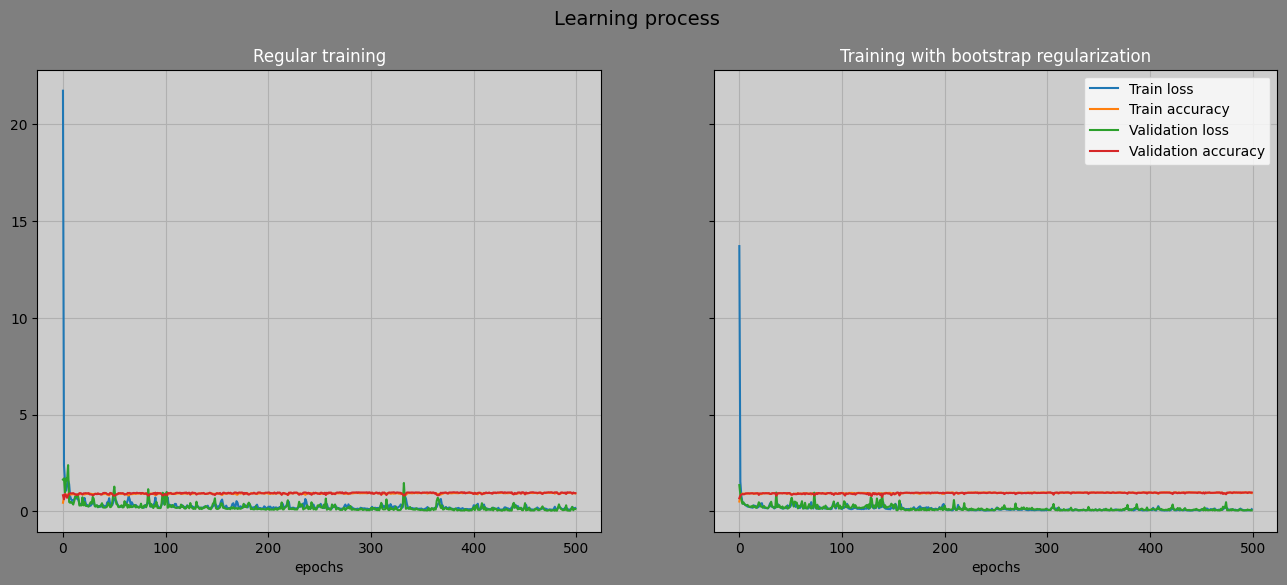

In [11]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train accuracy', 'Validation loss', 'Validation accuracy'], loc='best')
plt.show()


In [12]:
loss_1, accuracy_1 = model_1.evaluate(x_test, y_test)
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test accuracy': [accuracy_1, accuracy_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


4/4 [==============================] - 1s 8ms/step - loss: 0.0952 - accuracy: 0.9649


,Test accuracy,Test loss
,,
Regular training,0.929825,0.207605
Boostrap regularization,0.964912,0.095217


# Multi-class classification

## Experiment 3
### Sklearn wine dataset

In [13]:
data = load_wine()
X = data['data']
y = data['target']
y = to_categorical(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RS)
x_train = pd.DataFrame(x_train)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]

In [14]:
model_1 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'), 
    Dense(3, activation='softmax')
])

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/500
2/2 [==============================] - 2s 224ms/step - loss: 24.1612 - accuracy: 0.4248 - val_loss: 66.1402 - val_accuracy: 0.1034
Epoch 2/500
2/2 [==============================] - 0s 39ms/step - loss: 28.4810 - accuracy: 0.3274 - val_loss: 32.3880 - val_accuracy: 0.3103
Epoch 3/500
2/2 [==============================] - 0s 37ms/step - loss: 16.2793 - accuracy: 0.4248 - val_loss: 6.5392 - val_accuracy: 0.5862
Epoch 4/500
2/2 [==============================] - 0s 41ms/step - loss: 15.9281 - accuracy: 0.2655 - val_loss: 8.1783 - val_accuracy: 0.5862
Epoch 5/500
2/2 [==============================] - 0s 39ms/step - loss: 13.9078 - accuracy: 0.2655 - val_loss: 1.5491 - val_accuracy: 0.5862
Epoch 6/500
2/2 [==============================] - 0s 45ms/step - loss: 3.6447 - accuracy: 0.3540 - val_loss: 15.6504 - val_accuracy: 0.2759
Epoch 7/500
2/2 [==============================] - 0s 55ms/step - loss: 8.7063 - accuracy: 0.4867 - val_loss: 15.5974 - val_accuracy: 0.3103
Epoch 8/50

In [15]:
model_2 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'), 
    Dense(3, activation='softmax')
])

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

df = pd.DataFrame(columns=['loss', 'accuracy', 'val_loss', 'val_accuracy'])


for i in range(BOOTSTRAP_SAMPLES):
    train_data = x_train.sample(BOOTSTRAP_SAMPLE*2, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


Epoch 1/50
4/4 [==============================] - 1s 81ms/step - loss: 27.8684 - accuracy: 0.2819 - val_loss: 12.8522 - val_accuracy: 0.2807
Epoch 2/50
4/4 [==============================] - 0s 16ms/step - loss: 10.3169 - accuracy: 0.4758 - val_loss: 8.5107 - val_accuracy: 0.2105
Epoch 3/50
4/4 [==============================] - 0s 14ms/step - loss: 6.9970 - accuracy: 0.3040 - val_loss: 4.8416 - val_accuracy: 0.3509
Epoch 4/50
4/4 [==============================] - 0s 14ms/step - loss: 4.6848 - accuracy: 0.4097 - val_loss: 1.2356 - val_accuracy: 0.5965
Epoch 5/50
4/4 [==============================] - 0s 14ms/step - loss: 2.8277 - accuracy: 0.5727 - val_loss: 2.2451 - val_accuracy: 0.5614
Epoch 6/50
4/4 [==============================] - 0s 14ms/step - loss: 1.8702 - accuracy: 0.6256 - val_loss: 1.1451 - val_accuracy: 0.5965
Epoch 7/50
4/4 [==============================] - 0s 15ms/step - loss: 1.0900 - accuracy: 0.6476 - val_loss: 1.2695 - val_accuracy: 0.6842
Epoch 8/50
4/4 [========

<ipython-input-15-e0fcd3768b61>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


4/4 [==============================] - 0s 15ms/step - loss: 0.8840 - accuracy: 0.6740 - val_loss: 0.5012 - val_accuracy: 0.7719
Epoch 3/50
4/4 [==============================] - 0s 15ms/step - loss: 0.7103 - accuracy: 0.7137 - val_loss: 0.9496 - val_accuracy: 0.6491
Epoch 4/50
4/4 [==============================] - 0s 13ms/step - loss: 1.0121 - accuracy: 0.6696 - val_loss: 0.4759 - val_accuracy: 0.7719
Epoch 5/50
4/4 [==============================] - 0s 14ms/step - loss: 0.8173 - accuracy: 0.6916 - val_loss: 0.6048 - val_accuracy: 0.6667
Epoch 6/50
4/4 [==============================] - 0s 14ms/step - loss: 0.8112 - accuracy: 0.6916 - val_loss: 1.1324 - val_accuracy: 0.6667
Epoch 7/50
4/4 [==============================] - 0s 14ms/step - loss: 0.8747 - accuracy: 0.6608 - val_loss: 0.6521 - val_accuracy: 0.6491
Epoch 8/50
4/4 [==============================] - 0s 22ms/step - loss: 0.5808 - accuracy: 0.7621 - val_loss: 0.3739 - val_accuracy: 0.8070
Epoch 9/50
4/4 [======================

<ipython-input-15-e0fcd3768b61>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


4/4 [==============================] - 0s 15ms/step - loss: 0.2177 - accuracy: 0.9207 - val_loss: 0.2467 - val_accuracy: 0.9298
Epoch 3/50
4/4 [==============================] - 0s 14ms/step - loss: 0.1949 - accuracy: 0.9427 - val_loss: 0.3673 - val_accuracy: 0.8772
Epoch 4/50
4/4 [==============================] - 0s 14ms/step - loss: 0.2264 - accuracy: 0.9295 - val_loss: 0.2484 - val_accuracy: 0.9298
Epoch 5/50
4/4 [==============================] - 0s 20ms/step - loss: 0.2070 - accuracy: 0.9427 - val_loss: 0.2446 - val_accuracy: 0.9123
Epoch 6/50
4/4 [==============================] - 0s 20ms/step - loss: 0.1931 - accuracy: 0.9339 - val_loss: 0.2351 - val_accuracy: 0.9123
Epoch 7/50
4/4 [==============================] - 0s 16ms/step - loss: 0.1911 - accuracy: 0.9471 - val_loss: 0.2658 - val_accuracy: 0.9298
Epoch 8/50
4/4 [==============================] - 0s 14ms/step - loss: 0.2124 - accuracy: 0.9339 - val_loss: 0.3226 - val_accuracy: 0.9123
Epoch 9/50
4/4 [======================

<ipython-input-15-e0fcd3768b61>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


4/4 [==============================] - 0s 16ms/step - loss: 0.2067 - accuracy: 0.9339 - val_loss: 0.2658 - val_accuracy: 0.9298
Epoch 3/50
4/4 [==============================] - 0s 14ms/step - loss: 0.2154 - accuracy: 0.9427 - val_loss: 0.1613 - val_accuracy: 0.9298
Epoch 4/50
4/4 [==============================] - 0s 16ms/step - loss: 0.2075 - accuracy: 0.9427 - val_loss: 0.2463 - val_accuracy: 0.9298
Epoch 5/50
4/4 [==============================] - 0s 14ms/step - loss: 0.2382 - accuracy: 0.8987 - val_loss: 0.2554 - val_accuracy: 0.9474
Epoch 6/50
4/4 [==============================] - 0s 15ms/step - loss: 0.2402 - accuracy: 0.9207 - val_loss: 0.3811 - val_accuracy: 0.8246
Epoch 7/50
4/4 [==============================] - 0s 14ms/step - loss: 0.2609 - accuracy: 0.8855 - val_loss: 0.3234 - val_accuracy: 0.8421
Epoch 8/50
4/4 [==============================] - 0s 15ms/step - loss: 0.2558 - accuracy: 0.9251 - val_loss: 0.2204 - val_accuracy: 0.9298
Epoch 9/50
4/4 [======================

<ipython-input-15-e0fcd3768b61>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


4/4 [==============================] - 0s 15ms/step - loss: 0.1274 - accuracy: 0.9736 - val_loss: 0.3215 - val_accuracy: 0.8772
Epoch 3/50
4/4 [==============================] - 0s 14ms/step - loss: 0.1486 - accuracy: 0.9471 - val_loss: 0.2872 - val_accuracy: 0.8772
Epoch 4/50
4/4 [==============================] - 0s 14ms/step - loss: 0.1249 - accuracy: 0.9604 - val_loss: 0.3291 - val_accuracy: 0.8772
Epoch 5/50
4/4 [==============================] - 0s 15ms/step - loss: 0.1228 - accuracy: 0.9780 - val_loss: 0.2666 - val_accuracy: 0.8772
Epoch 6/50
4/4 [==============================] - 0s 15ms/step - loss: 0.1093 - accuracy: 0.9736 - val_loss: 0.2495 - val_accuracy: 0.8772
Epoch 7/50
4/4 [==============================] - 0s 16ms/step - loss: 0.1032 - accuracy: 0.9780 - val_loss: 0.2627 - val_accuracy: 0.8596
Epoch 8/50
4/4 [==============================] - 0s 19ms/step - loss: 0.0953 - accuracy: 0.9780 - val_loss: 0.2662 - val_accuracy: 0.8947
Epoch 9/50
4/4 [======================

<ipython-input-15-e0fcd3768b61>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


4/4 [==============================] - 0s 55ms/step - loss: 0.2021 - accuracy: 0.9163 - val_loss: 0.0996 - val_accuracy: 0.9474
Epoch 2/50
4/4 [==============================] - 0s 21ms/step - loss: 0.1769 - accuracy: 0.9295 - val_loss: 0.1275 - val_accuracy: 0.9649
Epoch 3/50
4/4 [==============================] - 0s 27ms/step - loss: 0.1752 - accuracy: 0.9383 - val_loss: 0.2470 - val_accuracy: 0.8772
Epoch 4/50
4/4 [==============================] - 0s 22ms/step - loss: 0.3983 - accuracy: 0.8458 - val_loss: 0.4152 - val_accuracy: 0.8421
Epoch 5/50
4/4 [==============================] - 0s 21ms/step - loss: 0.5275 - accuracy: 0.8546 - val_loss: 0.2265 - val_accuracy: 0.9123
Epoch 6/50
4/4 [==============================] - 0s 25ms/step - loss: 0.4689 - accuracy: 0.8282 - val_loss: 0.1440 - val_accuracy: 0.9474
Epoch 7/50
4/4 [==============================] - 0s 27ms/step - loss: 0.4256 - accuracy: 0.8458 - val_loss: 0.2236 - val_accuracy: 0.9123
Epoch 8/50
4/4 [======================

<ipython-input-15-e0fcd3768b61>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


4/4 [==============================] - 0s 14ms/step - loss: 0.1350 - accuracy: 0.9559 - val_loss: 0.2577 - val_accuracy: 0.8772
Epoch 3/50
4/4 [==============================] - 0s 16ms/step - loss: 0.1485 - accuracy: 0.9427 - val_loss: 0.1561 - val_accuracy: 0.9474
Epoch 4/50
4/4 [==============================] - 0s 14ms/step - loss: 0.1197 - accuracy: 0.9559 - val_loss: 0.3236 - val_accuracy: 0.8421
Epoch 5/50
4/4 [==============================] - 0s 13ms/step - loss: 0.1263 - accuracy: 0.9471 - val_loss: 0.1374 - val_accuracy: 0.9474
Epoch 6/50
4/4 [==============================] - 0s 14ms/step - loss: 0.1199 - accuracy: 0.9559 - val_loss: 0.2403 - val_accuracy: 0.8947
Epoch 7/50
4/4 [==============================] - 0s 15ms/step - loss: 0.1130 - accuracy: 0.9515 - val_loss: 0.1649 - val_accuracy: 0.9474
Epoch 8/50
4/4 [==============================] - 0s 22ms/step - loss: 0.1011 - accuracy: 0.9648 - val_loss: 0.2322 - val_accuracy: 0.9123
Epoch 9/50
4/4 [======================

<ipython-input-15-e0fcd3768b61>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


4/4 [==============================] - 0s 15ms/step - loss: 0.1027 - accuracy: 0.9648 - val_loss: 0.0397 - val_accuracy: 0.9825
Epoch 3/50
4/4 [==============================] - 0s 14ms/step - loss: 0.1000 - accuracy: 0.9648 - val_loss: 0.0479 - val_accuracy: 0.9825
Epoch 4/50
4/4 [==============================] - 0s 15ms/step - loss: 0.0993 - accuracy: 0.9648 - val_loss: 0.0581 - val_accuracy: 0.9825
Epoch 5/50
4/4 [==============================] - 0s 20ms/step - loss: 0.0936 - accuracy: 0.9780 - val_loss: 0.0671 - val_accuracy: 0.9649
Epoch 6/50
4/4 [==============================] - 0s 20ms/step - loss: 0.0895 - accuracy: 0.9736 - val_loss: 0.0415 - val_accuracy: 0.9825
Epoch 7/50
4/4 [==============================] - 0s 14ms/step - loss: 0.0822 - accuracy: 0.9824 - val_loss: 0.0428 - val_accuracy: 0.9825
Epoch 8/50
4/4 [==============================] - 0s 15ms/step - loss: 0.0832 - accuracy: 0.9648 - val_loss: 0.0372 - val_accuracy: 0.9825
Epoch 9/50
4/4 [======================

<ipython-input-15-e0fcd3768b61>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


4/4 [==============================] - 0s 53ms/step - loss: 0.0935 - accuracy: 0.9515 - val_loss: 0.1188 - val_accuracy: 0.9474
Epoch 2/50
4/4 [==============================] - 0s 21ms/step - loss: 0.1103 - accuracy: 0.9471 - val_loss: 0.1158 - val_accuracy: 0.9123
Epoch 3/50
4/4 [==============================] - 0s 27ms/step - loss: 0.1558 - accuracy: 0.9383 - val_loss: 0.2945 - val_accuracy: 0.8947
Epoch 4/50
4/4 [==============================] - 0s 28ms/step - loss: 0.2161 - accuracy: 0.9251 - val_loss: 0.1083 - val_accuracy: 0.9474
Epoch 5/50
4/4 [==============================] - 0s 26ms/step - loss: 0.2817 - accuracy: 0.9383 - val_loss: 0.3404 - val_accuracy: 0.9298
Epoch 6/50
4/4 [==============================] - 0s 25ms/step - loss: 0.6674 - accuracy: 0.8370 - val_loss: 0.1952 - val_accuracy: 0.9474
Epoch 7/50
4/4 [==============================] - 0s 20ms/step - loss: 1.1853 - accuracy: 0.8106 - val_loss: 1.5548 - val_accuracy: 0.6842
Epoch 8/50
4/4 [======================

<ipython-input-15-e0fcd3768b61>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


4/4 [==============================] - 0s 15ms/step - loss: 0.0671 - accuracy: 0.9824 - val_loss: 0.0362 - val_accuracy: 0.9825
Epoch 3/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0729 - accuracy: 0.9824 - val_loss: 0.0454 - val_accuracy: 0.9825
Epoch 4/50
4/4 [==============================] - 0s 15ms/step - loss: 0.0715 - accuracy: 0.9780 - val_loss: 0.0435 - val_accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 14ms/step - loss: 0.0628 - accuracy: 0.9824 - val_loss: 0.0399 - val_accuracy: 0.9825
Epoch 6/50
4/4 [==============================] - 0s 14ms/step - loss: 0.0669 - accuracy: 0.9868 - val_loss: 0.0561 - val_accuracy: 0.9825
Epoch 7/50
4/4 [==============================] - 0s 14ms/step - loss: 0.0796 - accuracy: 0.9868 - val_loss: 0.0404 - val_accuracy: 0.9825
Epoch 8/50
4/4 [==============================] - 0s 18ms/step - loss: 0.0753 - accuracy: 0.9824 - val_loss: 0.0533 - val_accuracy: 0.9825
Epoch 9/50
4/4 [======================

<ipython-input-15-e0fcd3768b61>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


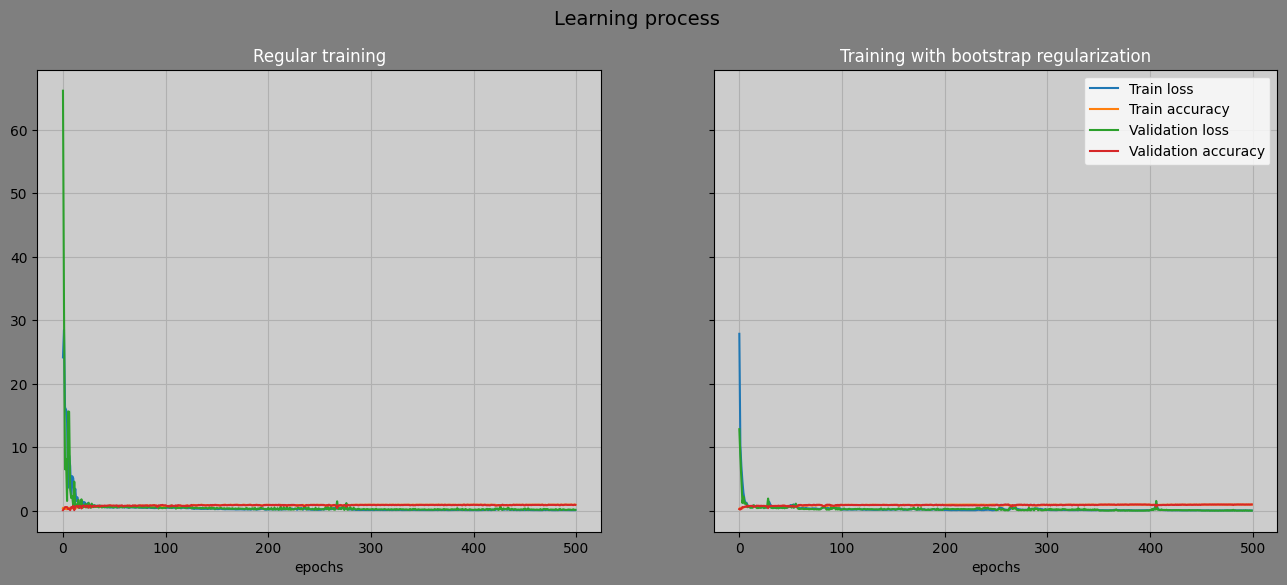

In [16]:
# Now we will vizualize the results of training for both models

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train accuracy', 'Validation loss', 'Validation accuracy'], loc='best')
plt.show()

In [17]:
loss_1, accuracy_1 = model_1.evaluate(x_test, y_test)
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test accuracy': [accuracy_1, accuracy_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


2/2 [==============================] - 0s 8ms/step - loss: 0.5125 - accuracy: 0.8889


,Test accuracy,Test loss
,,
Regular training,0.944444,0.324007
Boostrap regularization,0.888889,0.512516


## Experiment 4
### Sklearn iris dataset

In [18]:
data = load_iris()
X = data['data']
y = data['target']
y = to_categorical(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RS)
x_train = pd.DataFrame(x_train)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]

In [19]:
model_1 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'), 
    Dense(3, activation='softmax')
])

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/500
2/2 [==============================] - 1s 211ms/step - loss: 1.1112 - accuracy: 0.3542 - val_loss: 1.0289 - val_accuracy: 0.3333
Epoch 2/500
2/2 [==============================] - 0s 33ms/step - loss: 0.9703 - accuracy: 0.4375 - val_loss: 0.9204 - val_accuracy: 0.5833
Epoch 3/500
2/2 [==============================] - 0s 51ms/step - loss: 0.8476 - accuracy: 0.7604 - val_loss: 0.7856 - val_accuracy: 0.8333
Epoch 4/500
2/2 [==============================] - 0s 34ms/step - loss: 0.7287 - accuracy: 0.7917 - val_loss: 0.7091 - val_accuracy: 0.5833
Epoch 5/500
2/2 [==============================] - 0s 54ms/step - loss: 0.6383 - accuracy: 0.7083 - val_loss: 0.6169 - val_accuracy: 0.7917
Epoch 6/500
2/2 [==============================] - 0s 55ms/step - loss: 0.5534 - accuracy: 0.8333 - val_loss: 0.5355 - val_accuracy: 1.0000
Epoch 7/500
2/2 [==============================] - 0s 33ms/step - loss: 0.4781 - accuracy: 0.9271 - val_loss: 0.4790 - val_accuracy: 0.9167
Epoch 8/500
2/2 [==

In [20]:
model_2 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'), 
    Dense(3, activation='softmax')
])

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

df = pd.DataFrame(columns=['loss', 'accuracy', 'val_loss', 'val_accuracy'])

for i in range(BOOTSTRAP_SAMPLES):
    train_data = x_train.sample(BOOTSTRAP_SAMPLE*2, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


Epoch 1/50
3/3 [==============================] - 2s 131ms/step - loss: 0.9756 - accuracy: 0.4844 - val_loss: 0.7613 - val_accuracy: 0.7917
Epoch 2/50
3/3 [==============================] - 0s 20ms/step - loss: 0.7377 - accuracy: 0.7031 - val_loss: 0.5619 - val_accuracy: 0.7917
Epoch 3/50
3/3 [==============================] - 0s 22ms/step - loss: 0.5739 - accuracy: 0.7031 - val_loss: 0.4465 - val_accuracy: 0.7917
Epoch 4/50
3/3 [==============================] - 0s 22ms/step - loss: 0.4612 - accuracy: 0.7708 - val_loss: 0.3925 - val_accuracy: 0.9167
Epoch 5/50
3/3 [==============================] - 0s 21ms/step - loss: 0.3899 - accuracy: 0.8438 - val_loss: 0.3313 - val_accuracy: 0.9167
Epoch 6/50
3/3 [==============================] - 0s 28ms/step - loss: 0.3342 - accuracy: 0.9375 - val_loss: 0.2919 - val_accuracy: 0.9375
Epoch 7/50
3/3 [==============================] - 0s 19ms/step - loss: 0.2957 - accuracy: 0.8906 - val_loss: 0.2640 - val_accuracy: 0.9375
Epoch 8/50
3/3 [==========

<ipython-input-20-4de92ea072f6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 24ms/step - loss: 0.0694 - accuracy: 0.9635 - val_loss: 0.1613 - val_accuracy: 0.9375
Epoch 3/50
3/3 [==============================] - 0s 20ms/step - loss: 0.0826 - accuracy: 0.9740 - val_loss: 0.1615 - val_accuracy: 0.9375
Epoch 4/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0607 - accuracy: 0.9792 - val_loss: 0.1716 - val_accuracy: 0.8958
Epoch 5/50
3/3 [==============================] - 0s 31ms/step - loss: 0.0667 - accuracy: 0.9635 - val_loss: 0.1604 - val_accuracy: 0.9375
Epoch 6/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0690 - accuracy: 0.9740 - val_loss: 0.1726 - val_accuracy: 0.9375
Epoch 7/50
3/3 [==============================] - 0s 23ms/step - loss: 0.0735 - accuracy: 0.9740 - val_loss: 0.1769 - val_accuracy: 0.8958
Epoch 8/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0769 - accuracy: 0.9688 - val_loss: 0.1701 - val_accuracy: 0.9375
Epoch 9/50
3/3 [======================

<ipython-input-20-4de92ea072f6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 24ms/step - loss: 0.0635 - accuracy: 0.9740 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 3/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0510 - accuracy: 0.9896 - val_loss: 0.0231 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 28ms/step - loss: 0.0523 - accuracy: 0.9896 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 28ms/step - loss: 0.0478 - accuracy: 0.9896 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 0s 23ms/step - loss: 0.0453 - accuracy: 0.9896 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 25ms/step - loss: 0.0457 - accuracy: 0.9948 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 8/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0497 - accuracy: 0.9896 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 9/50
3/3 [======================

<ipython-input-20-4de92ea072f6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 27ms/step - loss: 0.0353 - accuracy: 0.9896 - val_loss: 0.0965 - val_accuracy: 0.9792
Epoch 3/50
3/3 [==============================] - 0s 22ms/step - loss: 0.0394 - accuracy: 0.9896 - val_loss: 0.0942 - val_accuracy: 0.9792
Epoch 4/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0350 - accuracy: 0.9896 - val_loss: 0.0927 - val_accuracy: 0.9792
Epoch 5/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0355 - accuracy: 0.9896 - val_loss: 0.0921 - val_accuracy: 0.9792
Epoch 6/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0342 - accuracy: 0.9896 - val_loss: 0.0930 - val_accuracy: 0.9792
Epoch 7/50
3/3 [==============================] - 0s 22ms/step - loss: 0.0343 - accuracy: 0.9896 - val_loss: 0.0924 - val_accuracy: 0.9792
Epoch 8/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0366 - accuracy: 0.9896 - val_loss: 0.0915 - val_accuracy: 0.9792
Epoch 9/50
3/3 [======================

<ipython-input-20-4de92ea072f6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 24ms/step - loss: 0.0466 - accuracy: 0.9844 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 3/50
3/3 [==============================] - 0s 30ms/step - loss: 0.0339 - accuracy: 0.9896 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 29ms/step - loss: 0.0355 - accuracy: 0.9948 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0338 - accuracy: 0.9896 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 0s 31ms/step - loss: 0.0317 - accuracy: 0.9948 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 28ms/step - loss: 0.0346 - accuracy: 0.9948 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 8/50
3/3 [==============================] - 0s 20ms/step - loss: 0.0364 - accuracy: 0.9896 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 9/50
3/3 [======================

<ipython-input-20-4de92ea072f6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 65ms/step - loss: 0.0399 - accuracy: 0.9844 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 2/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0430 - accuracy: 0.9896 - val_loss: 0.0309 - val_accuracy: 0.9792
Epoch 3/50
3/3 [==============================] - 0s 20ms/step - loss: 0.0385 - accuracy: 0.9896 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 20ms/step - loss: 0.0323 - accuracy: 0.9948 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 25ms/step - loss: 0.0340 - accuracy: 0.9896 - val_loss: 0.0256 - val_accuracy: 0.9792
Epoch 6/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0341 - accuracy: 0.9896 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0350 - accuracy: 0.9948 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 8/50
3/3 [======================

<ipython-input-20-4de92ea072f6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 92ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 2/50
3/3 [==============================] - 0s 40ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0198 - val_accuracy: 0.9792
Epoch 3/50
3/3 [==============================] - 0s 33ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 42ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0229 - val_accuracy: 0.9792
Epoch 5/50
3/3 [==============================] - 0s 43ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0515 - val_accuracy: 0.9792
Epoch 6/50
3/3 [==============================] - 0s 53ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0354 - val_accuracy: 0.9792
Epoch 7/50
3/3 [==============================] - 0s 53ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0354 - val_accuracy: 0.9792
Epoch 8/50
3/3 [======================

<ipython-input-20-4de92ea072f6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 24ms/step - loss: 0.0469 - accuracy: 0.9896 - val_loss: 0.0890 - val_accuracy: 0.9792
Epoch 3/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0573 - accuracy: 0.9896 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 27ms/step - loss: 0.0413 - accuracy: 0.9948 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0306 - accuracy: 0.9948 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0303 - accuracy: 0.9948 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 23ms/step - loss: 0.0289 - accuracy: 0.9948 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 8/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0358 - accuracy: 0.9896 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 9/50
3/3 [======================

<ipython-input-20-4de92ea072f6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 25ms/step - loss: 0.0763 - accuracy: 0.9688 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch 3/50
3/3 [==============================] - 0s 20ms/step - loss: 0.0763 - accuracy: 0.9688 - val_loss: 0.0263 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 23ms/step - loss: 0.0631 - accuracy: 0.9844 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 20ms/step - loss: 0.0699 - accuracy: 0.9792 - val_loss: 0.0276 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 0s 20ms/step - loss: 0.0950 - accuracy: 0.9583 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 20ms/step - loss: 0.1223 - accuracy: 0.9635 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 8/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0861 - accuracy: 0.9635 - val_loss: 0.0854 - val_accuracy: 0.9792
Epoch 9/50
3/3 [======================

<ipython-input-20-4de92ea072f6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 19ms/step - loss: 0.0308 - accuracy: 0.9896 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 3/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0431 - accuracy: 0.9896 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 22ms/step - loss: 0.0442 - accuracy: 0.9896 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0368 - accuracy: 0.9896 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0221 - accuracy: 0.9948 - val_loss: 0.0314 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 26ms/step - loss: 0.0288 - accuracy: 0.9948 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 8/50
3/3 [==============================] - 0s 32ms/step - loss: 0.0212 - accuracy: 0.9948 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 9/50
3/3 [======================

<ipython-input-20-4de92ea072f6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


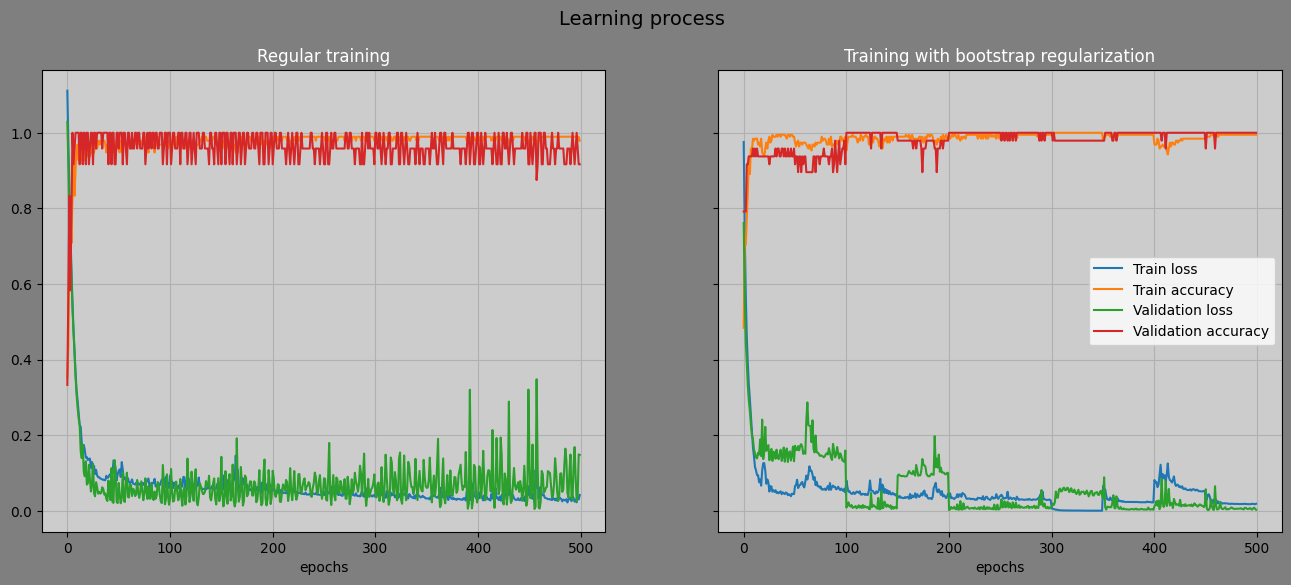

In [21]:
# Now we will vizualize the results of training for both models

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train accuracy', 'Validation loss', 'Validation accuracy'], loc='best')
plt.show()

In [22]:
loss_1, accuracy_1 = model_1.evaluate(x_test, y_test)
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test accuracy': [accuracy_1, accuracy_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


1/1 [==============================] - 0s 167ms/step - loss: 0.0118 - accuracy: 1.0000


,Test accuracy,Test loss
,,
Regular training,0.966667,0.071138
Boostrap regularization,1.000000,0.011795


# Regression

## Experiment 5
### Sklearn diabetes dataset

In [23]:
data = load_diabetes()
X = data['data']
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RS)
x_train = pd.DataFrame(x_train)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]


In [24]:
model_1 = Sequential([
    Dense(100, input_dim = INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)]
)

model_1.compile(optimizer='adam', loss="mean_squared_error", metrics=['mean_absolute_error'])

# Train first model

history_1 = model_1.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT)

Epoch 1/500
5/5 [==============================] - 2s 66ms/step - loss: 31505.7051 - mean_absolute_error: 158.6078 - val_loss: 22394.9688 - val_mean_absolute_error: 133.7616
Epoch 2/500
5/5 [==============================] - 0s 20ms/step - loss: 31217.0820 - mean_absolute_error: 157.7245 - val_loss: 21635.7422 - val_mean_absolute_error: 130.9614
Epoch 3/500
5/5 [==============================] - 0s 25ms/step - loss: 29269.5195 - mean_absolute_error: 151.3788 - val_loss: 17022.4551 - val_mean_absolute_error: 112.5165
Epoch 4/500
5/5 [==============================] - 0s 18ms/step - loss: 19190.9355 - mean_absolute_error: 114.1254 - val_loss: 3905.8362 - val_mean_absolute_error: 49.3016
Epoch 5/500
5/5 [==============================] - 0s 22ms/step - loss: 7814.4263 - mean_absolute_error: 75.8110 - val_loss: 6410.5615 - val_mean_absolute_error: 69.5637
Epoch 6/500
5/5 [==============================] - 0s 21ms/step - loss: 5012.0508 - mean_absolute_error: 59.1408 - val_loss: 4291.3691 -

In [25]:
model_2 = Sequential([
    Dense(100, input_dim = INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)]
)

model_2.compile(optimizer='adam', loss="mean_squared_error", metrics=['mean_absolute_error'])

df = pd.DataFrame(columns=['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

for i in range(BOOTSTRAP_SAMPLES):
    train_data = x_train.sample(BOOTSTRAP_SAMPLE*2, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)

Epoch 1/50
9/9 [==============================] - 3s 71ms/step - loss: 28883.0840 - mean_absolute_error: 151.3890 - val_loss: 30876.5703 - val_mean_absolute_error: 156.4773
Epoch 2/50
9/9 [==============================] - 0s 34ms/step - loss: 24776.8535 - mean_absolute_error: 136.9957 - val_loss: 15578.3047 - val_mean_absolute_error: 98.6197
Epoch 3/50
9/9 [==============================] - 0s 33ms/step - loss: 8245.6729 - mean_absolute_error: 75.0572 - val_loss: 5352.4312 - val_mean_absolute_error: 60.8678
Epoch 4/50
9/9 [==============================] - 0s 38ms/step - loss: 5323.4351 - mean_absolute_error: 57.1224 - val_loss: 4117.7183 - val_mean_absolute_error: 52.5765
Epoch 5/50
9/9 [==============================] - 0s 32ms/step - loss: 3739.4033 - mean_absolute_error: 51.2651 - val_loss: 4155.3818 - val_mean_absolute_error: 51.0964
Epoch 6/50
9/9 [==============================] - 0s 30ms/step - loss: 3384.4399 - mean_absolute_error: 45.9587 - val_loss: 3703.7219 - val_mean_abs

<ipython-input-25-b188bda50ade>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


9/9 [==============================] - 0s 21ms/step - loss: 2457.3667 - mean_absolute_error: 37.0592 - val_loss: 2536.7756 - val_mean_absolute_error: 38.8088
Epoch 2/50
9/9 [==============================] - 0s 20ms/step - loss: 2483.2097 - mean_absolute_error: 37.9092 - val_loss: 2890.9441 - val_mean_absolute_error: 42.1594
Epoch 3/50
9/9 [==============================] - 0s 18ms/step - loss: 2435.6313 - mean_absolute_error: 38.0975 - val_loss: 2463.4990 - val_mean_absolute_error: 37.9295
Epoch 4/50
9/9 [==============================] - 0s 17ms/step - loss: 2219.1406 - mean_absolute_error: 36.1670 - val_loss: 2389.2197 - val_mean_absolute_error: 37.3359
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 2072.1819 - mean_absolute_error: 34.7173 - val_loss: 2303.1851 - val_mean_absolute_error: 35.8112
Epoch 6/50
9/9 [==============================] - 0s 16ms/step - loss: 2006.5326 - mean_absolute_error: 33.9352 - val_loss: 2364.1572 - val_mean_absolute_error: 36.16

<ipython-input-25-b188bda50ade>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


9/9 [==============================] - 0s 22ms/step - loss: 1317.0100 - mean_absolute_error: 25.3167 - val_loss: 1588.2568 - val_mean_absolute_error: 29.3920
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 985.7295 - mean_absolute_error: 23.1290 - val_loss: 1305.2065 - val_mean_absolute_error: 27.1003
Epoch 3/50
9/9 [==============================] - 0s 17ms/step - loss: 986.1984 - mean_absolute_error: 23.8599 - val_loss: 1223.0765 - val_mean_absolute_error: 26.1972
Epoch 4/50
9/9 [==============================] - 0s 17ms/step - loss: 944.4591 - mean_absolute_error: 23.6951 - val_loss: 1753.8789 - val_mean_absolute_error: 32.5069
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 989.6144 - mean_absolute_error: 24.4320 - val_loss: 1099.0105 - val_mean_absolute_error: 25.4535
Epoch 6/50
9/9 [==============================] - 0s 17ms/step - loss: 666.8290 - mean_absolute_error: 19.4230 - val_loss: 1284.0498 - val_mean_absolute_error: 27.7721
Ep

<ipython-input-25-b188bda50ade>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


9/9 [==============================] - 0s 32ms/step - loss: 696.2785 - mean_absolute_error: 16.1075 - val_loss: 557.2322 - val_mean_absolute_error: 17.3761
Epoch 2/50
9/9 [==============================] - 0s 24ms/step - loss: 512.9154 - mean_absolute_error: 16.7666 - val_loss: 509.2693 - val_mean_absolute_error: 16.8646
Epoch 3/50
9/9 [==============================] - 0s 25ms/step - loss: 781.1238 - mean_absolute_error: 21.3627 - val_loss: 686.4445 - val_mean_absolute_error: 21.6328
Epoch 4/50
9/9 [==============================] - 0s 24ms/step - loss: 518.4001 - mean_absolute_error: 16.8748 - val_loss: 462.4987 - val_mean_absolute_error: 16.5542
Epoch 5/50
9/9 [==============================] - 0s 25ms/step - loss: 378.9309 - mean_absolute_error: 14.6760 - val_loss: 376.1994 - val_mean_absolute_error: 14.9140
Epoch 6/50
9/9 [==============================] - 0s 27ms/step - loss: 401.7352 - mean_absolute_error: 15.4455 - val_loss: 387.6096 - val_mean_absolute_error: 14.7218
Epoch 7/5

<ipython-input-25-b188bda50ade>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


9/9 [==============================] - 0s 21ms/step - loss: 258.3824 - mean_absolute_error: 10.2648 - val_loss: 183.7903 - val_mean_absolute_error: 9.6302
Epoch 2/50
9/9 [==============================] - 0s 19ms/step - loss: 192.4021 - mean_absolute_error: 10.0734 - val_loss: 213.5380 - val_mean_absolute_error: 10.9210
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 181.3237 - mean_absolute_error: 10.3194 - val_loss: 211.1746 - val_mean_absolute_error: 11.5963
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 195.8369 - mean_absolute_error: 10.8309 - val_loss: 189.7276 - val_mean_absolute_error: 10.8984
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 176.6269 - mean_absolute_error: 10.1746 - val_loss: 285.8206 - val_mean_absolute_error: 13.0905
Epoch 6/50
9/9 [==============================] - 0s 17ms/step - loss: 120.9874 - mean_absolute_error: 8.0807 - val_loss: 226.0649 - val_mean_absolute_error: 11.1264
Epoch 7/50


<ipython-input-25-b188bda50ade>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


9/9 [==============================] - 0s 35ms/step - loss: 94.4184 - mean_absolute_error: 6.3421 - val_loss: 69.5573 - val_mean_absolute_error: 6.3640
Epoch 2/50
9/9 [==============================] - 0s 27ms/step - loss: 52.4850 - mean_absolute_error: 5.3346 - val_loss: 47.6372 - val_mean_absolute_error: 4.6050
Epoch 3/50
9/9 [==============================] - 0s 26ms/step - loss: 38.7345 - mean_absolute_error: 4.6262 - val_loss: 63.9049 - val_mean_absolute_error: 6.0694
Epoch 4/50
9/9 [==============================] - 0s 23ms/step - loss: 42.9942 - mean_absolute_error: 5.2073 - val_loss: 60.7482 - val_mean_absolute_error: 5.1837
Epoch 5/50
9/9 [==============================] - 0s 25ms/step - loss: 32.5020 - mean_absolute_error: 4.3620 - val_loss: 51.5838 - val_mean_absolute_error: 5.0140
Epoch 6/50
9/9 [==============================] - 0s 26ms/step - loss: 39.3496 - mean_absolute_error: 4.8966 - val_loss: 48.3594 - val_mean_absolute_error: 3.8414
Epoch 7/50
9/9 [=================

<ipython-input-25-b188bda50ade>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


9/9 [==============================] - 0s 22ms/step - loss: 75.0763 - mean_absolute_error: 5.5951 - val_loss: 88.7193 - val_mean_absolute_error: 7.7998
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 62.0727 - mean_absolute_error: 6.0092 - val_loss: 54.3052 - val_mean_absolute_error: 5.3246
Epoch 3/50
9/9 [==============================] - 0s 18ms/step - loss: 46.3835 - mean_absolute_error: 5.3211 - val_loss: 51.6108 - val_mean_absolute_error: 5.4040
Epoch 4/50
9/9 [==============================] - 0s 18ms/step - loss: 33.4478 - mean_absolute_error: 4.4255 - val_loss: 45.3742 - val_mean_absolute_error: 5.1275
Epoch 5/50
9/9 [==============================] - 0s 26ms/step - loss: 35.4850 - mean_absolute_error: 4.6216 - val_loss: 61.5618 - val_mean_absolute_error: 5.6653
Epoch 6/50
9/9 [==============================] - 0s 27ms/step - loss: 47.8271 - mean_absolute_error: 5.2334 - val_loss: 67.7082 - val_mean_absolute_error: 6.1757
Epoch 7/50
9/9 [=================

<ipython-input-25-b188bda50ade>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


9/9 [==============================] - 0s 22ms/step - loss: 18.5583 - mean_absolute_error: 2.3557 - val_loss: 15.4990 - val_mean_absolute_error: 2.7751
Epoch 2/50
9/9 [==============================] - 0s 18ms/step - loss: 20.8419 - mean_absolute_error: 3.4198 - val_loss: 16.7164 - val_mean_absolute_error: 3.1923
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 20.5071 - mean_absolute_error: 3.4180 - val_loss: 40.2857 - val_mean_absolute_error: 5.3259
Epoch 4/50
9/9 [==============================] - 0s 17ms/step - loss: 23.2449 - mean_absolute_error: 3.6445 - val_loss: 23.5968 - val_mean_absolute_error: 3.9242
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 28.2843 - mean_absolute_error: 4.1600 - val_loss: 19.1802 - val_mean_absolute_error: 3.4483
Epoch 6/50
9/9 [==============================] - 0s 17ms/step - loss: 28.5334 - mean_absolute_error: 4.2187 - val_loss: 14.2861 - val_mean_absolute_error: 2.9202
Epoch 7/50
9/9 [=================

<ipython-input-25-b188bda50ade>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


9/9 [==============================] - 0s 34ms/step - loss: 34.0761 - mean_absolute_error: 4.0767 - val_loss: 41.8680 - val_mean_absolute_error: 5.2511
Epoch 2/50
9/9 [==============================] - 0s 26ms/step - loss: 28.0816 - mean_absolute_error: 4.0304 - val_loss: 15.2372 - val_mean_absolute_error: 3.0390
Epoch 3/50
9/9 [==============================] - 0s 23ms/step - loss: 14.5736 - mean_absolute_error: 2.9576 - val_loss: 14.7319 - val_mean_absolute_error: 3.0521
Epoch 4/50
9/9 [==============================] - 0s 18ms/step - loss: 12.1703 - mean_absolute_error: 2.6788 - val_loss: 24.2866 - val_mean_absolute_error: 3.7095
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 11.8035 - mean_absolute_error: 2.6733 - val_loss: 16.2100 - val_mean_absolute_error: 3.1672
Epoch 6/50
9/9 [==============================] - 0s 18ms/step - loss: 11.5908 - mean_absolute_error: 2.6997 - val_loss: 19.6105 - val_mean_absolute_error: 3.6228
Epoch 7/50
9/9 [=================

<ipython-input-25-b188bda50ade>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


9/9 [==============================] - 0s 23ms/step - loss: 16.7794 - mean_absolute_error: 2.3908 - val_loss: 25.1320 - val_mean_absolute_error: 3.7377
Epoch 2/50
9/9 [==============================] - 0s 17ms/step - loss: 14.2248 - mean_absolute_error: 2.8598 - val_loss: 16.4800 - val_mean_absolute_error: 3.0115
Epoch 3/50
9/9 [==============================] - 0s 18ms/step - loss: 13.8887 - mean_absolute_error: 2.8619 - val_loss: 20.4188 - val_mean_absolute_error: 3.7602
Epoch 4/50
9/9 [==============================] - 0s 19ms/step - loss: 13.9472 - mean_absolute_error: 2.9197 - val_loss: 9.1744 - val_mean_absolute_error: 2.3469
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 18.7529 - mean_absolute_error: 3.3234 - val_loss: 13.5078 - val_mean_absolute_error: 2.8578
Epoch 6/50
9/9 [==============================] - 0s 18ms/step - loss: 29.0949 - mean_absolute_error: 4.2865 - val_loss: 24.0655 - val_mean_absolute_error: 3.9408
Epoch 7/50
9/9 [==================

<ipython-input-25-b188bda50ade>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


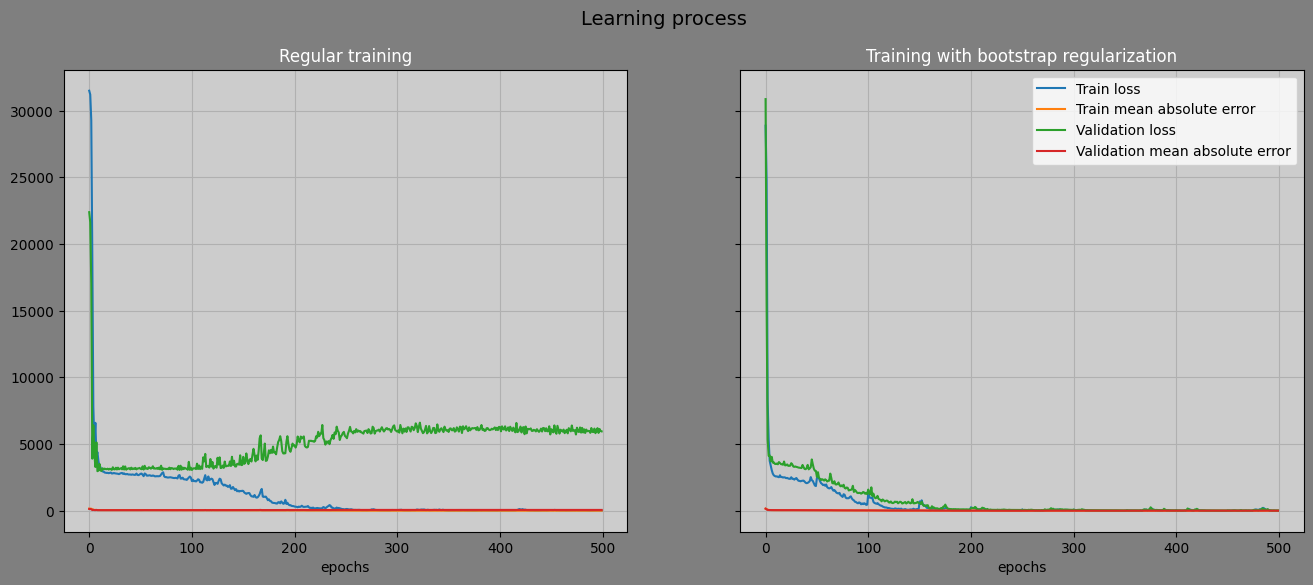

In [26]:
# Now we will vizualize the results of training for both models

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train mean absolute error', 'Validation loss', 'Validation mean absolute error'], loc='best')
plt.show()

In [27]:
loss_1, mae_1 = model_1.evaluate(x_test, y_test)
loss_2, mae_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test mean absolute error': [mae_1, mae_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


3/3 [==============================] - 0s 5ms/step - loss: 3836.9705 - mean_absolute_error: 48.8558


,Test mean absolute error,Test loss
,,
Regular training,56.327122,5498.459473
Boostrap regularization,48.855793,3836.970459


## Experiment 6
### california housing sklearn dataset

In [28]:
data = fetch_california_housing()

y = data['target']
X = data['data']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RS)
x_train = pd.DataFrame(x_train)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]

In [29]:
model_1 = Sequential([
    Dense(100, input_dim = INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)]
)

model_1.compile(optimizer='adam', loss="mean_squared_error", metrics=['mean_absolute_error'])

history_1 = model_1.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT)

Epoch 1/500
207/207 [==============================] - 6s 20ms/step - loss: 20.7462 - mean_absolute_error: 1.8688 - val_loss: 1.3965 - val_mean_absolute_error: 0.9290
Epoch 2/500
207/207 [==============================] - 5s 23ms/step - loss: 1.4736 - mean_absolute_error: 0.9584 - val_loss: 2.5478 - val_mean_absolute_error: 1.3132
Epoch 3/500
207/207 [==============================] - 3s 14ms/step - loss: 2.3093 - mean_absolute_error: 1.0965 - val_loss: 1.4333 - val_mean_absolute_error: 0.8931
Epoch 4/500
207/207 [==============================] - 3s 12ms/step - loss: 1.3526 - mean_absolute_error: 0.9190 - val_loss: 1.4119 - val_mean_absolute_error: 0.8883
Epoch 5/500
207/207 [==============================] - 2s 12ms/step - loss: 1.3065 - mean_absolute_error: 0.9046 - val_loss: 1.2620 - val_mean_absolute_error: 0.8621
Epoch 6/500
207/207 [==============================] - 3s 13ms/step - loss: 1.2547 - mean_absolute_error: 0.8860 - val_loss: 1.3531 - val_mean_absolute_error: 0.9552
Epo

In [30]:
model_2 = Sequential([
    Dense(100, input_dim = INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)]
)

model_2.compile(optimizer='adam', loss="mean_squared_error", metrics=['mean_absolute_error'])

df = pd.DataFrame(columns=['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

for i in range(BOOTSTRAP_SAMPLES):
    train_data = x_train.sample(BOOTSTRAP_SAMPLE*2, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)

Epoch 1/50
413/413 [==============================] - 8s 15ms/step - loss: 101.0433 - mean_absolute_error: 2.2160 - val_loss: 1.4168 - val_mean_absolute_error: 0.9873
Epoch 2/50
413/413 [==============================] - 8s 19ms/step - loss: 1.8157 - mean_absolute_error: 0.9981 - val_loss: 1.2883 - val_mean_absolute_error: 0.8755
Epoch 3/50
413/413 [==============================] - 5s 12ms/step - loss: 1.3682 - mean_absolute_error: 0.8886 - val_loss: 1.2647 - val_mean_absolute_error: 0.8093
Epoch 4/50
413/413 [==============================] - 6s 14ms/step - loss: 0.8924 - mean_absolute_error: 0.7076 - val_loss: 0.6637 - val_mean_absolute_error: 0.6200
Epoch 5/50
413/413 [==============================] - 6s 14ms/step - loss: 0.9725 - mean_absolute_error: 0.7154 - val_loss: 0.7086 - val_mean_absolute_error: 0.6167
Epoch 6/50
413/413 [==============================] - 5s 13ms/step - loss: 0.7211 - mean_absolute_error: 0.6345 - val_loss: 0.6289 - val_mean_absolute_error: 0.5905
Epoch 7/

<ipython-input-30-b188bda50ade>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


413/413 [==============================] - 5s 12ms/step - loss: 0.4889 - mean_absolute_error: 0.5176 - val_loss: 0.4611 - val_mean_absolute_error: 0.5021
Epoch 2/50
413/413 [==============================] - 7s 16ms/step - loss: 0.6440 - mean_absolute_error: 0.5243 - val_loss: 0.4610 - val_mean_absolute_error: 0.5090
Epoch 3/50
413/413 [==============================] - 5s 12ms/step - loss: 0.4762 - mean_absolute_error: 0.5115 - val_loss: 0.4608 - val_mean_absolute_error: 0.4936
Epoch 4/50
413/413 [==============================] - 6s 13ms/step - loss: 0.4757 - mean_absolute_error: 0.5105 - val_loss: 0.4485 - val_mean_absolute_error: 0.4885
Epoch 5/50
413/413 [==============================] - 6s 15ms/step - loss: 0.4712 - mean_absolute_error: 0.5075 - val_loss: 0.4497 - val_mean_absolute_error: 0.4982
Epoch 6/50
413/413 [==============================] - 5s 12ms/step - loss: 0.4713 - mean_absolute_error: 0.5066 - val_loss: 0.4560 - val_mean_absolute_error: 0.4893
Epoch 7/50
413/413 [=

<ipython-input-30-b188bda50ade>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


413/413 [==============================] - 5s 12ms/step - loss: 0.4028 - mean_absolute_error: 0.4630 - val_loss: 0.4010 - val_mean_absolute_error: 0.4572
Epoch 2/50
413/413 [==============================] - 6s 14ms/step - loss: 0.3894 - mean_absolute_error: 0.4540 - val_loss: 0.3772 - val_mean_absolute_error: 0.4502
Epoch 3/50
413/413 [==============================] - 6s 14ms/step - loss: 0.3870 - mean_absolute_error: 0.4538 - val_loss: 0.3919 - val_mean_absolute_error: 0.4557
Epoch 4/50
413/413 [==============================] - 5s 12ms/step - loss: 0.3789 - mean_absolute_error: 0.4496 - val_loss: 0.3974 - val_mean_absolute_error: 0.4503
Epoch 5/50
413/413 [==============================] - 7s 16ms/step - loss: 0.3877 - mean_absolute_error: 0.4532 - val_loss: 0.3951 - val_mean_absolute_error: 0.4614
Epoch 6/50
413/413 [==============================] - 6s 13ms/step - loss: 0.3804 - mean_absolute_error: 0.4496 - val_loss: 0.3855 - val_mean_absolute_error: 0.4568
Epoch 7/50
413/413 [=

<ipython-input-30-b188bda50ade>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


413/413 [==============================] - 5s 12ms/step - loss: 0.3588 - mean_absolute_error: 0.4326 - val_loss: 0.3928 - val_mean_absolute_error: 0.4416
Epoch 2/50
413/413 [==============================] - 7s 17ms/step - loss: 0.3483 - mean_absolute_error: 0.4262 - val_loss: 0.3437 - val_mean_absolute_error: 0.4157
Epoch 3/50
413/413 [==============================] - 5s 12ms/step - loss: 0.3589 - mean_absolute_error: 0.4332 - val_loss: 0.3675 - val_mean_absolute_error: 0.4445
Epoch 4/50
413/413 [==============================] - 6s 15ms/step - loss: 0.3544 - mean_absolute_error: 0.4312 - val_loss: 0.3362 - val_mean_absolute_error: 0.4106
Epoch 5/50
413/413 [==============================] - 8s 20ms/step - loss: 0.3473 - mean_absolute_error: 0.4257 - val_loss: 0.3522 - val_mean_absolute_error: 0.4264
Epoch 6/50
413/413 [==============================] - 5s 12ms/step - loss: 0.3467 - mean_absolute_error: 0.4250 - val_loss: 0.3415 - val_mean_absolute_error: 0.4160
Epoch 7/50
413/413 [=

<ipython-input-30-b188bda50ade>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


413/413 [==============================] - 7s 17ms/step - loss: 0.3407 - mean_absolute_error: 0.4218 - val_loss: 0.3516 - val_mean_absolute_error: 0.4415
Epoch 2/50
413/413 [==============================] - 5s 12ms/step - loss: 0.3295 - mean_absolute_error: 0.4144 - val_loss: 0.3191 - val_mean_absolute_error: 0.4120
Epoch 3/50
413/413 [==============================] - 6s 15ms/step - loss: 0.3235 - mean_absolute_error: 0.4100 - val_loss: 0.3011 - val_mean_absolute_error: 0.3935
Epoch 4/50
413/413 [==============================] - 8s 18ms/step - loss: 0.3174 - mean_absolute_error: 0.4071 - val_loss: 0.5123 - val_mean_absolute_error: 0.5113
Epoch 5/50
413/413 [==============================] - 6s 14ms/step - loss: 0.3202 - mean_absolute_error: 0.4078 - val_loss: 0.3285 - val_mean_absolute_error: 0.4206
Epoch 6/50
413/413 [==============================] - 6s 15ms/step - loss: 0.3171 - mean_absolute_error: 0.4067 - val_loss: 0.3433 - val_mean_absolute_error: 0.4120
Epoch 7/50
413/413 [=

<ipython-input-30-b188bda50ade>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


413/413 [==============================] - 5s 12ms/step - loss: 0.3271 - mean_absolute_error: 0.4113 - val_loss: 0.3217 - val_mean_absolute_error: 0.4220
Epoch 2/50
413/413 [==============================] - 6s 14ms/step - loss: 0.3229 - mean_absolute_error: 0.4094 - val_loss: 0.3116 - val_mean_absolute_error: 0.3956
Epoch 3/50
413/413 [==============================] - 6s 15ms/step - loss: 0.3031 - mean_absolute_error: 0.3970 - val_loss: 0.3098 - val_mean_absolute_error: 0.4090
Epoch 4/50
413/413 [==============================] - 7s 17ms/step - loss: 0.3056 - mean_absolute_error: 0.3979 - val_loss: 0.2847 - val_mean_absolute_error: 0.3861
Epoch 5/50
413/413 [==============================] - 7s 17ms/step - loss: 0.3216 - mean_absolute_error: 0.4083 - val_loss: 0.3266 - val_mean_absolute_error: 0.4086
Epoch 6/50
413/413 [==============================] - 5s 12ms/step - loss: 0.3157 - mean_absolute_error: 0.4032 - val_loss: 0.2712 - val_mean_absolute_error: 0.3747
Epoch 7/50
413/413 [=

<ipython-input-30-b188bda50ade>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


413/413 [==============================] - 6s 14ms/step - loss: 0.3084 - mean_absolute_error: 0.4013 - val_loss: 0.2713 - val_mean_absolute_error: 0.3792
Epoch 2/50
413/413 [==============================] - 6s 15ms/step - loss: 0.2906 - mean_absolute_error: 0.3893 - val_loss: 0.2799 - val_mean_absolute_error: 0.3786
Epoch 3/50
413/413 [==============================] - 5s 12ms/step - loss: 0.3006 - mean_absolute_error: 0.3964 - val_loss: 0.2814 - val_mean_absolute_error: 0.3774
Epoch 4/50
413/413 [==============================] - 9s 22ms/step - loss: 0.2979 - mean_absolute_error: 0.3945 - val_loss: 0.2682 - val_mean_absolute_error: 0.3726
Epoch 5/50
413/413 [==============================] - 6s 13ms/step - loss: 0.2879 - mean_absolute_error: 0.3877 - val_loss: 0.3046 - val_mean_absolute_error: 0.4073
Epoch 6/50
413/413 [==============================] - 5s 12ms/step - loss: 0.2832 - mean_absolute_error: 0.3836 - val_loss: 0.2992 - val_mean_absolute_error: 0.4046
Epoch 7/50
413/413 [=

<ipython-input-30-b188bda50ade>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


413/413 [==============================] - 7s 17ms/step - loss: 0.3055 - mean_absolute_error: 0.3958 - val_loss: 0.3264 - val_mean_absolute_error: 0.4048
Epoch 2/50
413/413 [==============================] - 5s 12ms/step - loss: 0.2845 - mean_absolute_error: 0.3823 - val_loss: 0.3221 - val_mean_absolute_error: 0.3998
Epoch 3/50
413/413 [==============================] - 6s 16ms/step - loss: 0.3026 - mean_absolute_error: 0.3957 - val_loss: 0.2993 - val_mean_absolute_error: 0.3894
Epoch 4/50
413/413 [==============================] - 8s 19ms/step - loss: 0.2952 - mean_absolute_error: 0.3890 - val_loss: 0.2726 - val_mean_absolute_error: 0.3717
Epoch 5/50
413/413 [==============================] - 5s 13ms/step - loss: 0.3037 - mean_absolute_error: 0.3942 - val_loss: 0.2998 - val_mean_absolute_error: 0.3964
Epoch 6/50
413/413 [==============================] - 7s 17ms/step - loss: 0.2898 - mean_absolute_error: 0.3839 - val_loss: 0.2764 - val_mean_absolute_error: 0.3781
Epoch 7/50
413/413 [=

<ipython-input-30-b188bda50ade>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


413/413 [==============================] - 6s 13ms/step - loss: 0.2789 - mean_absolute_error: 0.3741 - val_loss: 0.3017 - val_mean_absolute_error: 0.3884
Epoch 2/50
413/413 [==============================] - 7s 17ms/step - loss: 0.2870 - mean_absolute_error: 0.3823 - val_loss: 0.2719 - val_mean_absolute_error: 0.3611
Epoch 3/50
413/413 [==============================] - 5s 13ms/step - loss: 0.2527 - mean_absolute_error: 0.3566 - val_loss: 0.3068 - val_mean_absolute_error: 0.3850
Epoch 4/50
413/413 [==============================] - 6s 14ms/step - loss: 0.2709 - mean_absolute_error: 0.3690 - val_loss: 0.2993 - val_mean_absolute_error: 0.3844
Epoch 5/50
413/413 [==============================] - 9s 22ms/step - loss: 0.2750 - mean_absolute_error: 0.3729 - val_loss: 0.2815 - val_mean_absolute_error: 0.3805
Epoch 6/50
413/413 [==============================] - 5s 13ms/step - loss: 0.2572 - mean_absolute_error: 0.3592 - val_loss: 0.3264 - val_mean_absolute_error: 0.3987
Epoch 7/50
413/413 [=

<ipython-input-30-b188bda50ade>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


413/413 [==============================] - 6s 14ms/step - loss: 0.2671 - mean_absolute_error: 0.3656 - val_loss: 0.2717 - val_mean_absolute_error: 0.3613
Epoch 2/50
413/413 [==============================] - 7s 16ms/step - loss: 0.2460 - mean_absolute_error: 0.3509 - val_loss: 0.2980 - val_mean_absolute_error: 0.3903
Epoch 3/50
413/413 [==============================] - 5s 12ms/step - loss: 0.2853 - mean_absolute_error: 0.3793 - val_loss: 0.2852 - val_mean_absolute_error: 0.3854
Epoch 4/50
413/413 [==============================] - 8s 18ms/step - loss: 0.2610 - mean_absolute_error: 0.3617 - val_loss: 0.2381 - val_mean_absolute_error: 0.3487
Epoch 5/50
413/413 [==============================] - 5s 12ms/step - loss: 0.2513 - mean_absolute_error: 0.3532 - val_loss: 0.2976 - val_mean_absolute_error: 0.3798
Epoch 6/50
413/413 [==============================] - 6s 15ms/step - loss: 0.2374 - mean_absolute_error: 0.3430 - val_loss: 0.2501 - val_mean_absolute_error: 0.3512
Epoch 7/50
413/413 [=

<ipython-input-30-b188bda50ade>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


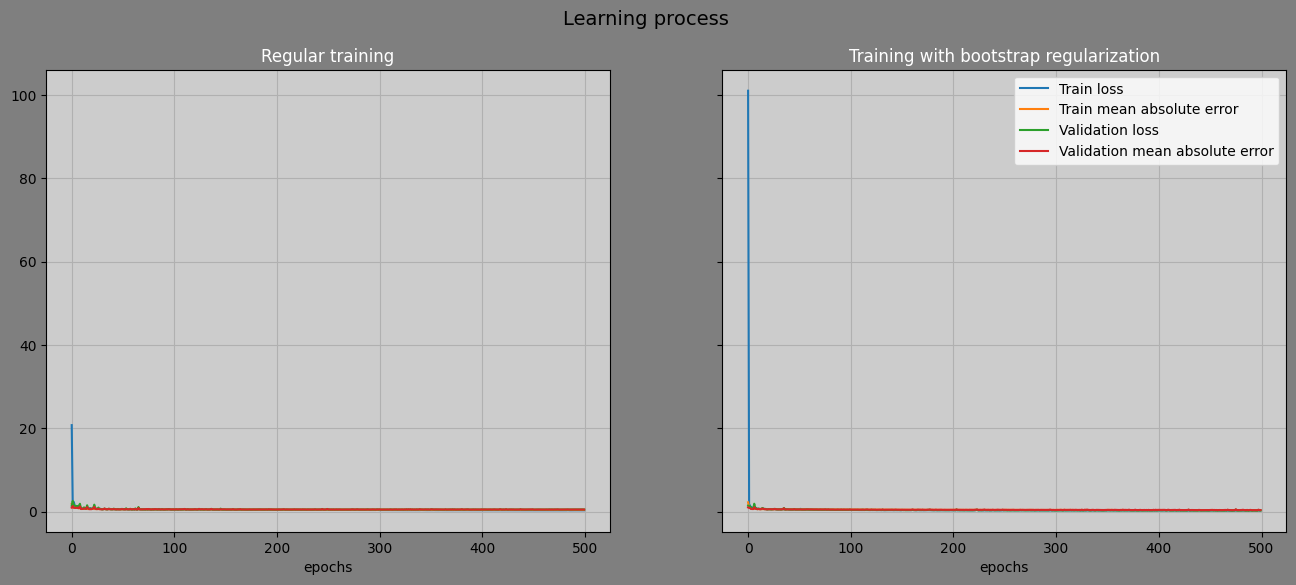

In [31]:
# Now we will vizualize the results of training for both models

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train mean absolute error', 'Validation loss', 'Validation mean absolute error'], loc='best')
plt.show()

In [32]:
loss_1, mae_1 = model_1.evaluate(x_test, y_test)
loss_2, mae_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test mean absolute error': [mae_1, mae_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


129/129 [==============================] - 1s 5ms/step - loss: 0.5229 - mean_absolute_error: 0.4965


,Test mean absolute error,Test loss
,,
Regular training,0.473613,0.456622
Boostrap regularization,0.496527,0.522915
